In [2]:
from medial_axis_map import MedialAxisGridMap

In [4]:
m = MedialAxisGridMap('colliders.csv', '2d Medial Axis Grid at 10 m Altitude', 10, (-122.39745, 37.79248, 0.0),[-7.46172411,  2.57509856,  3.268     ], [159.55897366,  93.91311928,  10.        ])

In [9]:
import matplotlib.pyplot as plt

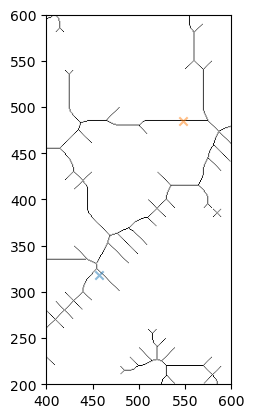

In [30]:
plt.imshow(m.grid, origin='lower', cmap='Greys')
plt.scatter(m.current_grid_location[1], m.current_grid_location[0], marker='x', alpha=0.5)
plt.scatter(m.goal_grid_location[1], m.goal_grid_location[0], marker='x', alpha=0.5)
plt.xlim([400, 600])
plt.ylim([200, 600])
plt.show()

In [18]:
print(m.current_grid_location)


(318, 457)
Closest gridcell: (323, 457)


(323, 457)

Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (485, 548)
Closest gridcell: (485, 548)


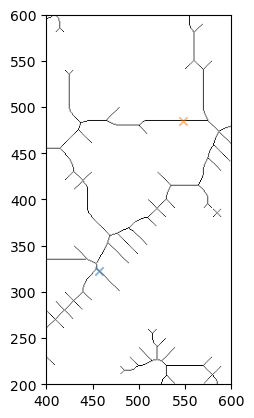

In [32]:
plt.imshow(m.grid, origin='lower', cmap='Greys')
plt.scatter(m.find_closest(m.current_grid_location)[1], m.find_closest(m.current_grid_location)[0], marker='x', alpha=0.5)
plt.scatter(m.find_closest(m.goal_grid_location)[1], m.find_closest(m.goal_grid_location)[0], marker='x', alpha=0.5)
plt.xlim([400, 600])
plt.ylim([200, 600])
plt.show()

In [81]:
m.grid[m.find_closest(m.goal_grid_location)]
# Valid path is True (Black)

Closest gridcell: (485, 548)


True

In [82]:
import numpy as np
from queue import PriorityQueue
frontier = PriorityQueue()
visited = set()
frontier.put((0.0, m.find_closest(m.current_grid_location)))
visited.add(m.current_grid_location)
travel_cost = 0.0
grid_sequence = []
found = False
pathinfo = {}

Closest gridcell: (323, 457)


In [83]:
frontier.queue

[(0.0, (323, 457))]

In [84]:
while not frontier.empty():

    _, gridcell = frontier.get()
    #print(f"gridcell popped: {gridcell}")

    if gridcell == m.goal_grid_location:
        found = True
        print('Found a path.')
        break
    
    free_neighbors = m.explore_free_neighbors(gridcell)
    #print(f"Its free neighbors: {free_neighbors}")
    
    for free_neighbor in free_neighbors:
        candidate_cell = free_neighbor[0]
        candidate_north, candidate_east = candidate_cell
        heuristic_cost = np.sqrt((candidate_north - m.goal_grid_location[0])**2 + (candidate_east - m.goal_grid_location[1])**2)
        action_cost = free_neighbor[1] 
        incremental_cost = action_cost + heuristic_cost
        candidate_total_cost = travel_cost + incremental_cost
        if candidate_cell not in visited:
            frontier.put((candidate_total_cost, candidate_cell))
            pathinfo[candidate_cell] = (gridcell, action_cost)
            visited.add(candidate_cell)

Found a path.


In [87]:
if found:
    subgoal = m.find_closest(m.goal_grid_location)
    origin, action_cost = pathinfo[subgoal]
    grid_sequence.append(subgoal)
    while origin != m.find_closest(m.current_grid_location):
        subgoal = origin
        origin, action_cost = pathinfo[subgoal]
        grid_sequence.append(subgoal)
    grid_sequence.append(origin)
    grid_sequence = grid_sequence[::-1]

Closest gridcell: (485, 548)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridce

Closest gridcell: (323, 457)
Closest gridcell: (323, 457)
Closest gridcell: (485, 548)
Closest gridcell: (485, 548)


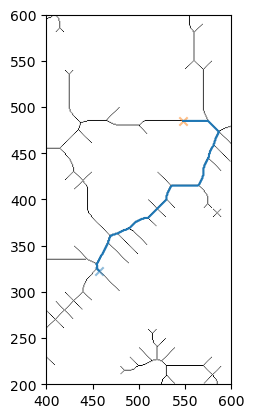

In [92]:
X = [point[0] for point in grid_sequence]
Y = [point[1] for point in grid_sequence]
plt.imshow(m.grid, origin='lower', cmap='Greys')
plt.scatter(m.find_closest(m.current_grid_location)[1], m.find_closest(m.current_grid_location)[0], marker='x', alpha=0.5)
plt.scatter(m.find_closest(m.goal_grid_location)[1], m.find_closest(m.goal_grid_location)[0], marker='x', alpha=0.5)
plt.xlim([400, 600])
plt.ylim([200, 600])
plt.plot(Y,X)
plt.show()


In [95]:
from enum import Enum

class NumberToEnum(Enum):
    ZERO = 0
    ONE = 1
    TWO = 2
    THREE = 3

number = 2
enum_value = NumberToEnum(number)

print(enum_value)

NumberToEnum.TWO
